# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification problem is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


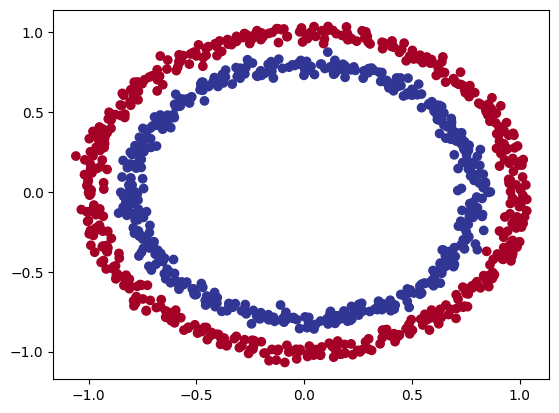

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu')

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [9]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 3.7253 - accuracy: 0.4660
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 2.4706 - accuracy: 0.4700
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.4860
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4860


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933178901672363, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we migth to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead SGD.
3. Fitting a model - perhapswe might fit our model for more epochs (leave it training for longer).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4960


[0.6940955519676208, 0.4959999918937683]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
    '''
    Plot the decision boundary created by a model predicting on X
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    '''

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('doing multiclassification')
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap='RdYlBu', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='RdYlBu')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [18]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

154/313 [=============>................] - ETA: 0s

313/313 [==============================] - 1s 2ms/step
doing binary classification


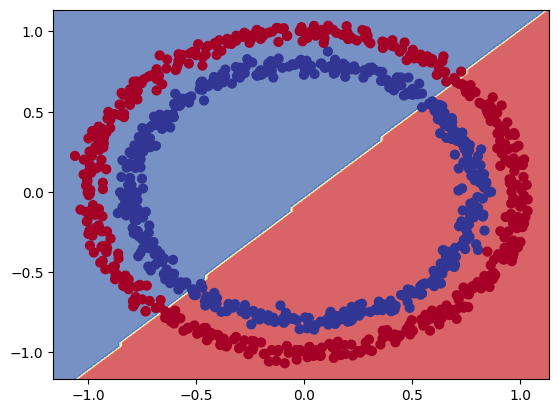

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [20]:
# Lets create a regression dataset to test the model

# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

Let's change the model to suit our data for a regression problem

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, -1), y_reg_train, epochs=100, verbose=0)

2/2 [==============================] - 0s 4ms/step


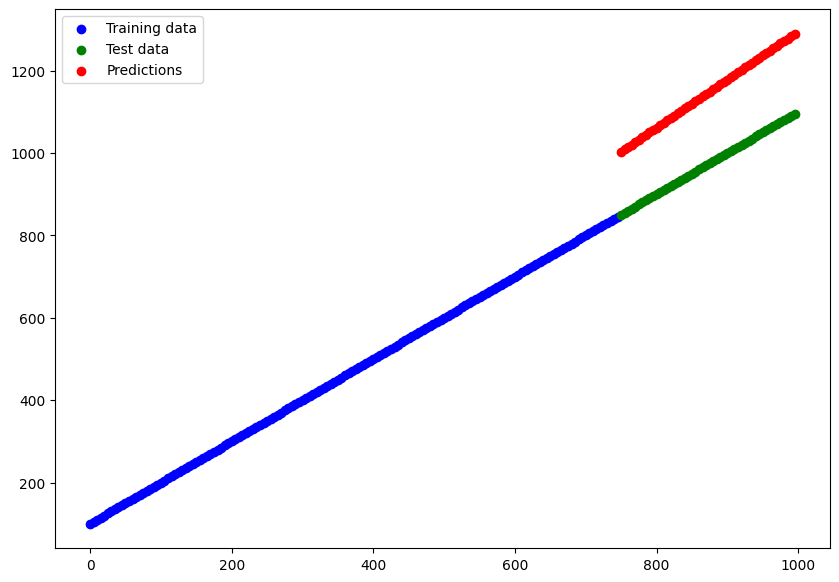

In [22]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

## The missing piece: Non-linearity

In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy']
)

# 3. Fit the model
history = model_4.fit(X, y, epochs=0)

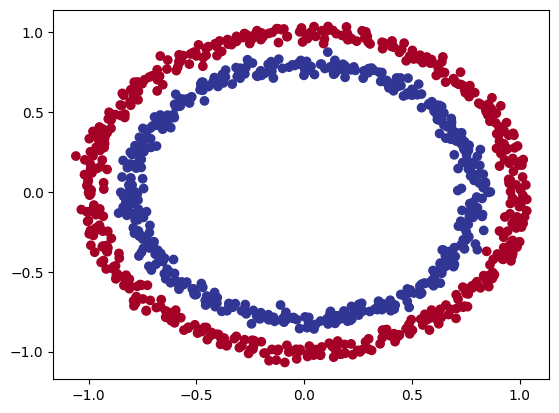

In [24]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu')

313/313 [==============================] - 1s 3ms/step
doing binary classification


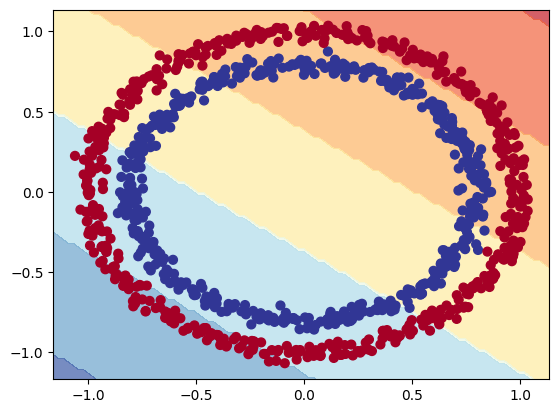

In [25]:
# Check the decision boundary for our latest model

plot_decision_boundary(model=model_4, X=X, y=y)

Let's try build our first neural network with a non-linear activation function.

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2905 - accuracy: 0.4270
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2210 - accuracy: 0.4410
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1728 - accuracy: 0.4470
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1232 - accuracy: 0.4500
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0802 - accuracy: 0.4540
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0601 - accuracy: 0.4540
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0484 - accuracy: 0.4530
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0344 - accuracy: 0.4530
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0223 - accuracy: 0.4550
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0087 - accuracy: 0.4560
Epoch 11/

  1/313 [..............................] - ETA: 41s

313/313 [==============================] - 1s 2ms/step
doing binary classification


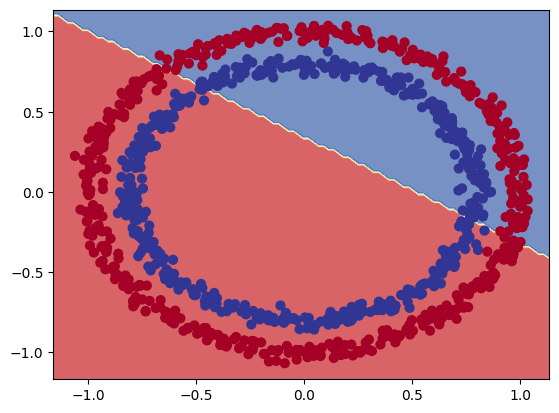

In [27]:
# Check the decision boundary for our latest model

plot_decision_boundary(model=model_5, X=X, y=y)

In [28]:
# Time to replicate the multi-layer neural network from TensorFlow playground code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.8707 - accuracy: 0.2710
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8375 - accuracy: 0.2070
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8277 - accuracy: 0.1580
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8210 - accuracy: 0.1290
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8148 - accuracy: 0.1000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8088 - accuracy: 0.1450
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8028 - accuracy: 0.0660
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7977 - accuracy: 0.0960
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7924 - accuracy: 0.0770
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7875 - accuracy: 0.1500
Epoch 11/

In [29]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9770


[0.16468647122383118, 0.9769999980926514]

313/313 [==============================] - 1s 2ms/step
doing binary classification


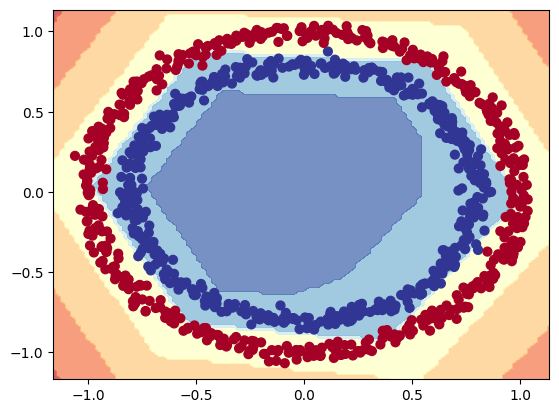

In [30]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [31]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5030
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5070
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5100
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5090
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5150
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5290
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5350
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5400
Epoch 11/

In [32]:
# 4. Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.9920


[0.19325338304042816, 0.9919999837875366]

313/313 [==============================] - 1s 2ms/step
doing binary classification


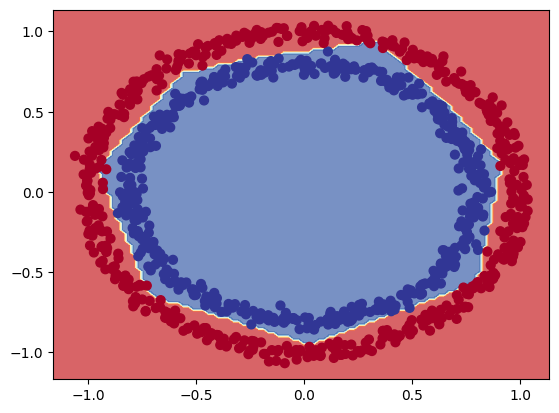

In [33]:
# Let's visualize metrics
plot_decision_boundary(model_7, X, y)

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [34]:
# Create a toy a tensor (similar to the data w pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

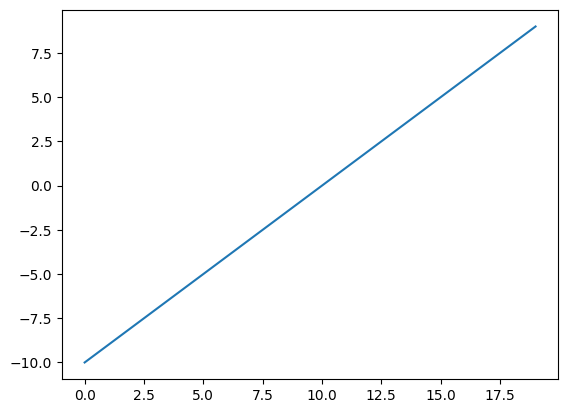

In [35]:
# Visualize our toy tensor
plt.plot(A)

In [36]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on out tour toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

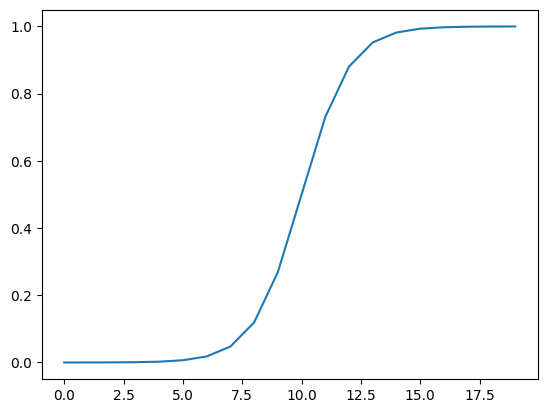

In [37]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [38]:
# Let's recreate the relu function
def relu(x):

    return tf.maximum(0, x)

# pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

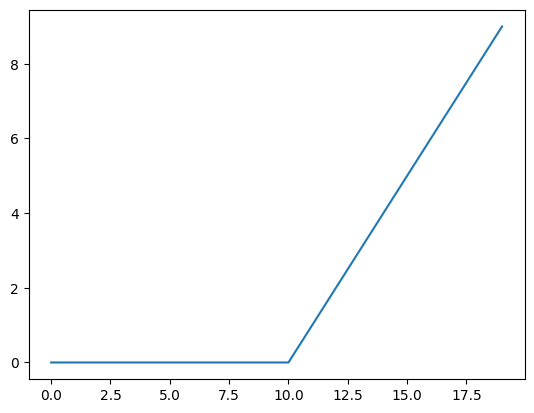

In [39]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [40]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

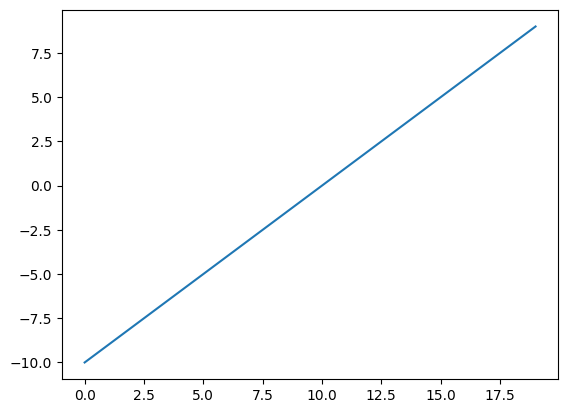

In [41]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [42]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improvig our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [43]:
# Check how many examples we have
len(X)

1000

In [44]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (came as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25


25/25 [==============================] - 1s 3ms/step - loss: 0.6850 - accuracy: 0.5525
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5512
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6225
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.5925
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6134 - accuracy: 0.6650
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.7262
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5459 - accuracy: 0.8213
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.8125
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.8687
Epoch 11/25
25/25 [===========

In [46]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.9800


[0.12098734825849533, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


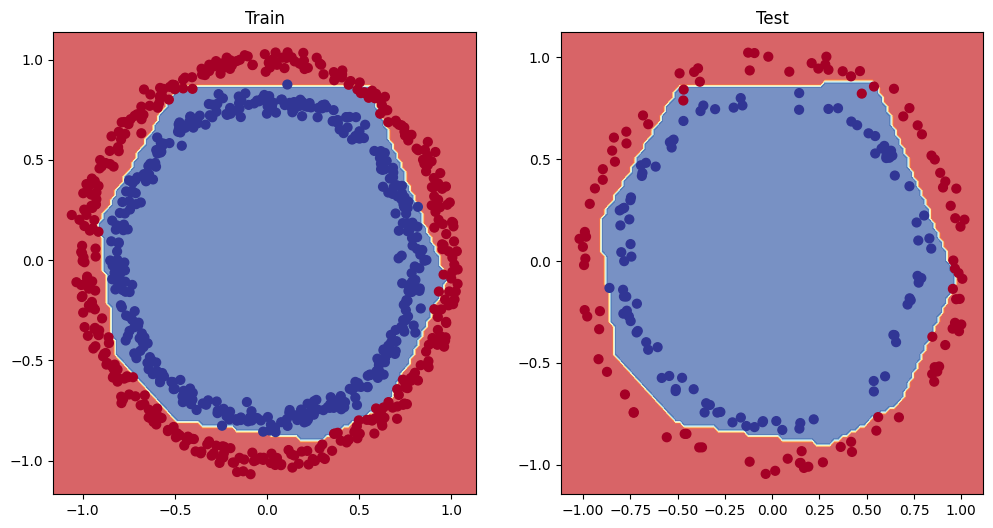

In [47]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [48]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684970,0.55250
1,0.674036,0.55125
2,0.663782,0.55125
3,0.650901,0.62250
4,0.636397,0.59250
5,0.613407,0.66500
6,0.584777,0.72625
7,0.545861,0.82125
8,0.502628,0.81250
9,0.458506,0.86875


Text(0.5, 1.0, 'Model_8 loss curves')

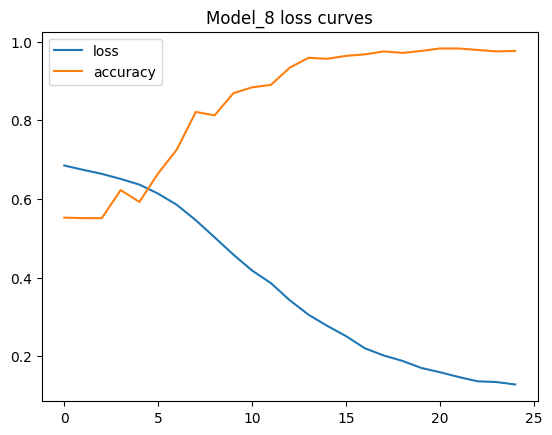

In [49]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning_rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while*.
* Another model (we could use the same one as above, but we're practicing building models here).
* Amodified loss curves plot.


In [50]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100,
                        callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 2s 2ms/step - loss: 0.6941 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5038 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

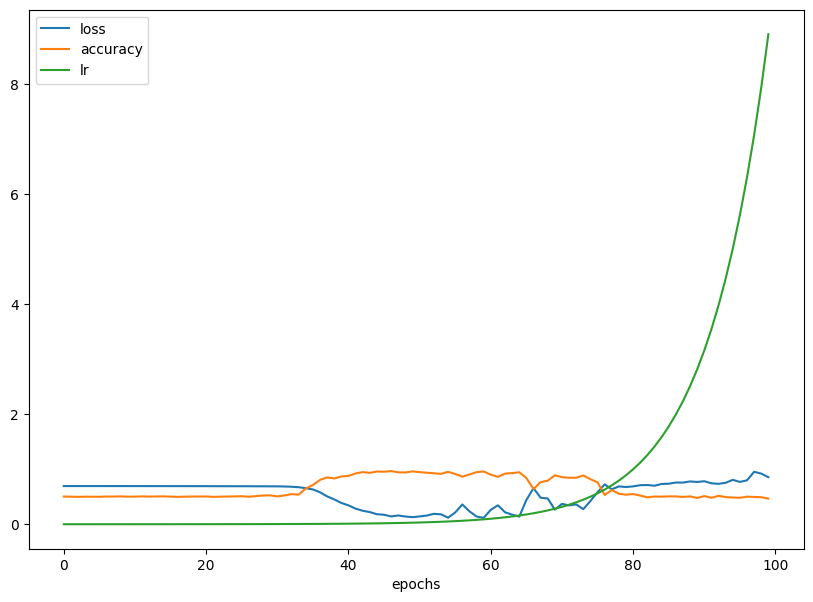

In [51]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

In [52]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 * tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-03, 1.05e-03, 1.10e-03, 1.15e-03,
       1.20e-03, 1.25e-03, 1.30e-03, 1.35e-03, 1.40e-03, 1.45e-03,
       1.50e-03, 1.55e-03, 1.60e-03, 1.65e-03, 1.70e-03, 1.75e-03,
       1.80e-03, 1.85e-03, 1.90e-03, 1.95e-03, 2.00e-03, 2.05e-03,
       2.10e-03, 2.15e-03, 2.20e-03, 2.25e-03, 2.30e-03, 2.35e-03,
       2.40e-03, 2.45e-03, 2.50e-03, 2.55e-03, 2.60e-03, 2.65e-03,
       2.70e-03, 2.75e-03, 2.80e-03, 2.85e-03, 2.90e-03, 2.95e-03,
       3.00e-03, 3.05e-03, 3.10e-03, 3.15e-03, 3.20e-03, 3.25e-03,
       3.30e-03, 3.35e-03, 3.40e-03, 3.45e-03, 3.50e-03, 3.55e-03,
       3.60e-03, 3.65e-03, 3.70e-03, 3.75e-03, 3.80e-03, 3.85e-03,
       3.90e-03, 3.95e-03, 4.00e-03, 4.05e-03, 4.10e-03, 4.15e-03,
       4.20e-0

In [53]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs. Loss')

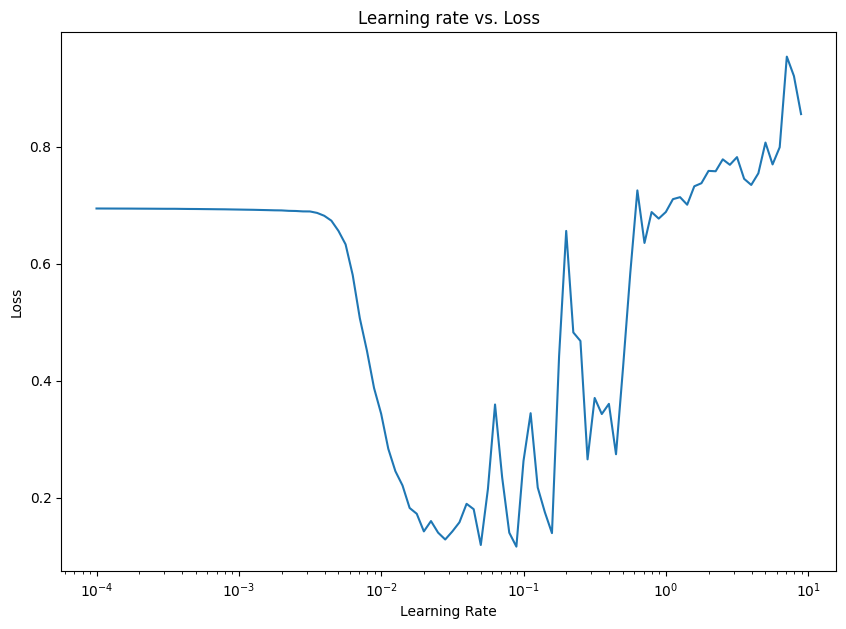

In [54]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

In [55]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
10**-2

0.01

In [57]:
# Let's try using a higher *ideal* learning rate with the same as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the ideal learning rate
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)


Epoch 1/20


25/25 [==============================] - 1s 3ms/step - loss: 0.7028 - accuracy: 0.4963
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5562
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6413
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.7025
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.7663
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.8363
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8537
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.9137
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9737
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9912
Epoch 11/20
25/25 [===========

In [58]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9900


[0.03946465626358986, 0.9900000095367432]

In [59]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.9800


[0.12098734825849533, 0.9800000190734863]

313/313 [==============================] - 1s 4ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


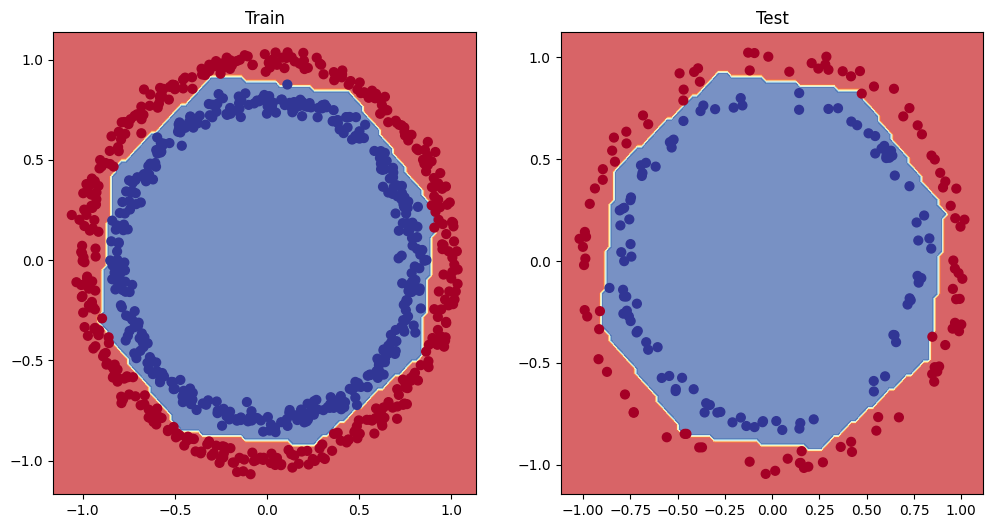

In [60]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods
Alongside visualizing our models results as much as possible, there are a hadful of other classification evaluaiton methods & metrics you should be familiar with:
* Accuracy
* Precision - a higher precision leads to less false positives
* Recall - a higher recall leads to less false negatives
* F1-score - a combination between both precision and recall
* Confusion matrix
* Classification report (from scikit-learn)



In [61]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the rest set: {loss}')
print(f'Model loss on the rest set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9900


Model loss on the rest set: 0.03946465626358986
Model loss on the rest set: 99.00%


In [62]:
# Compare with other classification evaluation methods

from sklearn import metrics
y_preds = model_10.predict(X_test)
y_preds

7/7 [==============================] - 0s 2ms/step


array([[9.87529695e-01],
       [9.98094261e-01],
       [9.97101009e-01],
       [9.97309744e-01],
       [4.27983791e-01],
       [4.35071671e-03],
       [9.94304717e-01],
       [3.72291636e-03],
       [9.97980714e-01],
       [2.47219391e-03],
       [9.87863243e-01],
       [2.17575505e-01],
       [9.97240007e-01],
       [9.84055161e-01],
       [9.95026231e-01],
       [9.97141719e-01],
       [9.90815282e-01],
       [9.30180252e-01],
       [2.22739168e-02],
       [9.90868032e-01],
       [2.93955347e-03],
       [9.68073368e-01],
       [9.97156322e-01],
       [9.95904803e-01],
       [1.58709325e-02],
       [9.32840347e-01],
       [9.95465040e-01],
       [1.51326999e-01],
       [1.40054971e-02],
       [9.97429550e-01],
       [2.03525648e-02],
       [9.93629873e-01],
       [9.97018814e-01],
       [1.23909367e-02],
       [4.39191908e-02],
       [9.96140301e-01],
       [9.90164936e-01],
       [9.61855173e-01],
       [9.95760441e-01],
       [9.95756030e-01],


In [63]:
# sklearn accuracy
accuracy = metrics.accuracy_score(y_test, np.round(y_preds))
accuracy

0.99

In [64]:
# sklearn precision
precision = metrics.precision_score(y_test, np.round(y_preds))
precision

0.9801980198019802

In [65]:
# sklearn recall
recall = metrics.recall_score(y_test, np.round(y_preds))
recall

1.0

How about a confusion matrix

In [66]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [67]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [68]:
y_preds[:10]

array([[0.9875297 ],
       [0.99809426],
       [0.997101  ],
       [0.99730974],
       [0.4279838 ],
       [0.00435072],
       [0.9943047 ],
       [0.00372292],
       [0.9979807 ],
       [0.00247219]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions

In [69]:
# Convert preciction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [70]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

How about we preffify our confussion matrix?

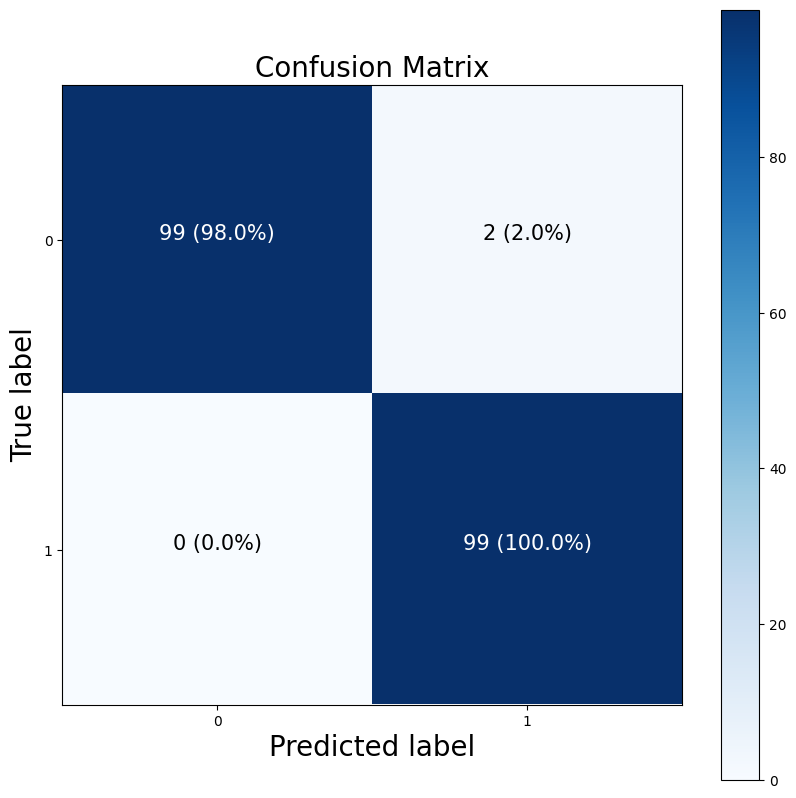

In [71]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
      xlabel="Predicted label",
      ylabel="True label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
          horizontalalignment="center",
          color="white" if cm[i, j] > threshold else "black",
          size=15)

## Working with  larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [72]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [73]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [74]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

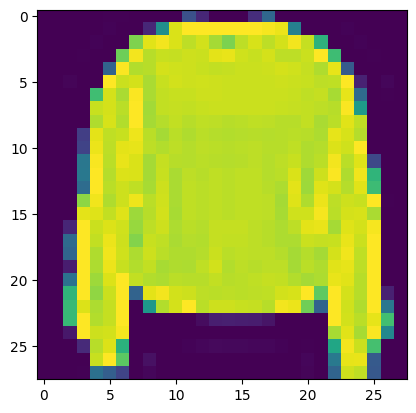

In [75]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [76]:
# Check out samples label
train_labels[7]

2

In [77]:
# Create a small list so we can index onto our training labels so they're human.readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Coat')

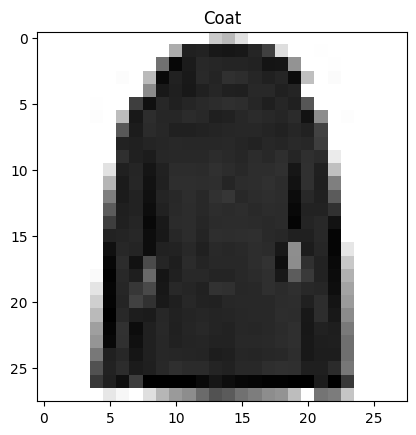

In [78]:
# Plot an example image and it's label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

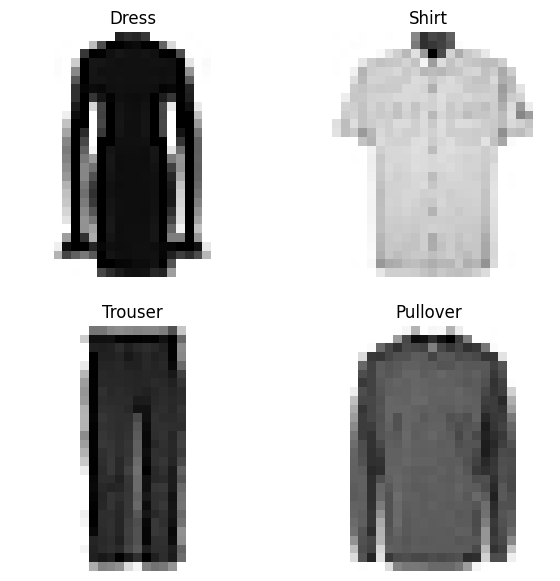

In [79]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded, use CategoricalCrossentropy()
    * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [80]:
train_data[0].shape

(28, 28)

In [81]:
len(class_names)

10

In [82]:
# Our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [83]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, 10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, 10)))

Epoch 1/10


1875/1875 [==============================] - 9s 4ms/step - loss: 2.3128 - accuracy: 0.1197 - val_loss: 2.1895 - val_accuracy: 0.1532
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1321 - accuracy: 0.1649 - val_loss: 1.9189 - val_accuracy: 0.2070
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7765 - accuracy: 0.2400 - val_loss: 1.6767 - val_accuracy: 0.2656
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6030 - accuracy: 0.3163 - val_loss: 1.5356 - val_accuracy: 0.3566
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5183 - accuracy: 0.3426 - val_loss: 1.4996 - val_accuracy: 0.3387
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4818 - accuracy: 0.3557 - val_loss: 1.4641 - val_accuracy: 0.3487
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4554 - accuracy: 0.3670 - val_loss: 1.4693 - val_accuracy: 0.3378
Epo

In [84]:
# Check the model summary()
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neaural networks prefer data to be scaled (or normalizec), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [86]:
# We can get our trining and testing data bewtween 0 & 1 by dividing the maximum
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [87]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4270 - accuracy: 0.4651 - val_loss: 1.1307 - val_accuracy: 0.5836
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9823 - accuracy: 0.6088 - val_loss: 0.9415 - val_accuracy: 0.5928
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8596 - accuracy: 0.6390 - val_loss: 0.8470 - val_accuracy: 0.6671
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7730 - accuracy: 0.7018 - val_loss: 0.7657 - val_accuracy: 0.7055
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7203 - accuracy: 0.7172 - val_loss: 0.7283 - val_accuracy: 0.7221
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6833 - accuracy: 0.7346 - val_loss: 0.7218 - val_accuracy: 0.7243
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6553 - accuracy: 0.7561 - val_loss: 0.6744 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

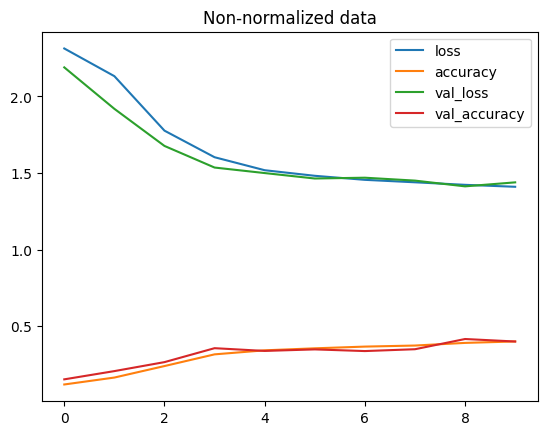

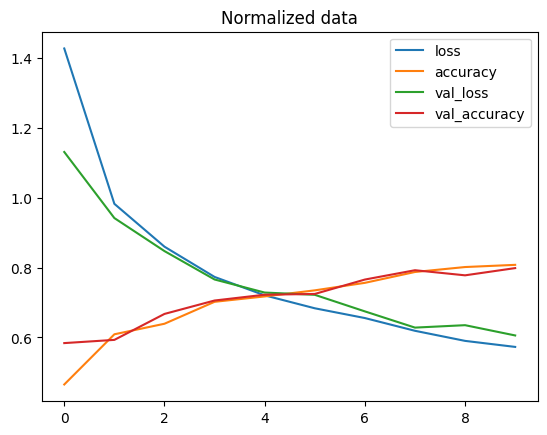

In [88]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [89]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4497 - accuracy: 0.4290 - val_loss: 1.0584 - val_accuracy: 0.5557 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9267 - accuracy: 0.6313 - val_loss: 0.8583 - val_accuracy: 0.6852 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7783 - accuracy: 0.7237 - val_loss: 0.7329 - val_accuracy: 0.7451 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6983 - accuracy: 0.7524 - val_loss: 0.6997 - val_accuracy: 0.7579 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6770 - accuracy: 0.7599 - val_loss: 0.6845 - val_accuracy: 0.7626 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6633 - accuracy: 0.7655 - val_loss: 0.7084 - val_accuracy: 0.7535 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

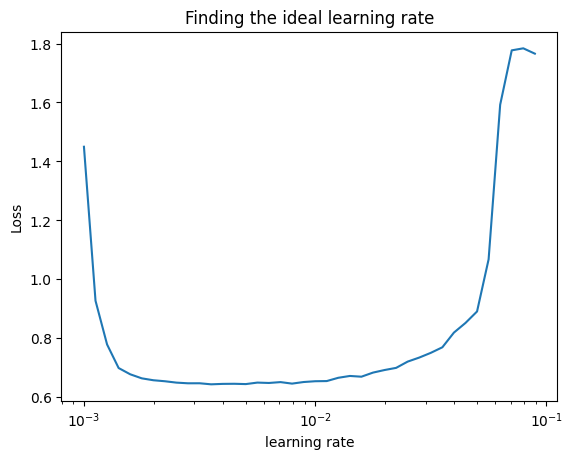

In [90]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [91]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=['accuracy'])

# Fit the model
history_14 = model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5328 - accuracy: 0.3581 - val_loss: 1.2811 - val_accuracy: 0.4851
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1416 - accuracy: 0.5567 - val_loss: 1.0744 - val_accuracy: 0.6039
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0180 - accuracy: 0.6102 - val_loss: 1.0074 - val_accuracy: 0.6192
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9645 - accuracy: 0.6249 - val_loss: 0.9693 - val_accuracy: 0.6308
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9163 - accuracy: 0.6419 - val_loss: 0.8938 - val_accuracy: 0.6586
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8467 - accuracy: 0.6747 - val_loss: 0.8398 - val_accuracy: 0.6873
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8110 - accuracy: 0.6976 - val_loss: 0.8234 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Svae and export it for use in an application

Let's go through the top 2...


In [92]:
# Create a confusion matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [93]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [94]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for 'prediction probabilities'

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.5384073e-19, 1.2605907e-15, 1.8811947e-21, 1.2403061e-08,
        1.2631247e-12, 2.9284659e-01, 4.6721638e-18, 2.3750423e-01,
        8.6486613e-04, 4.6878433e-01],
       [3.4237076e-03, 8.5912479e-06, 2.0518497e-01, 4.0718201e-03,
        5.5740386e-01, 9.7766472e-04, 1.2507847e-01, 9.0239795e-05,
        1.0376036e-01, 3.7569180e-07],
       [6.7408402e-03, 9.9022537e-01, 5.5230952e-08, 3.0281872e-03,
        2.2531339e-09, 5.4744781e-10, 5.5313822e-06, 3.1749733e-17,
        7.5463737e-18, 9.3190542e-12],
       [4.9567723e-04, 9.9163449e-01, 6.2787298e-10, 7.8695603e-03,
        3.5299502e-10, 1.1501381e-08, 2.5693492e-07, 5.1270756e-16,
        1.3871954e-17, 7.6113610e-10],
       [3.1024361e-01, 5.7591530e-03, 2.7152261e-01, 2.0806070e-02,
        2.6155783e-02, 7.9838665e-06, 3.6550316e-01, 5.8835017e-09,
        1.6081157e-06, 4.4285975e-09]], dtype=float32)

**Note:** Rember to make predictions on the same kind of data your model was trained on (e. g. if your model was trained on normalized data, you'll want to make predictions on normalized data')

In [96]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.5384073e-19, 1.2605907e-15, 1.8811947e-21, 1.2403061e-08,
        1.2631247e-12, 2.9284659e-01, 4.6721638e-18, 2.3750423e-01,
        8.6486613e-04, 4.6878433e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [97]:
# Convert all of the predictions probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 4, 1, 1, 6, 1, 4, 2, 5, 7], dtype=int64)

In [98]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[770,   2,  44,  93,  21,   1,  57,   0,  12,   0],
       [ 21, 909,   2,  56,   8,   0,   3,   0,   1,   0],
       [ 42,   0, 628,  20, 241,   2,  63,   0,   4,   0],
       [ 27,   8,   8, 859,  50,   9,  33,   0,   6,   0],
       [  2,   0, 161,  53, 730,   2,  40,   0,  12,   0],
       [  0,   0,   0,  18,   2, 826,   0,  76,  31,  47],
       [178,   0, 380,  69, 228,   2, 134,   0,   9,   0],
       [  0,   0,   0,   0,   0,  66,   0, 876,  10,  48],
       [  1,   0,   6,  16,  94,  32,   4,   8, 839,   0],
       [  0,   0,   0,   0,   1,  49,   0,  62,   0, 888]], dtype=int64)

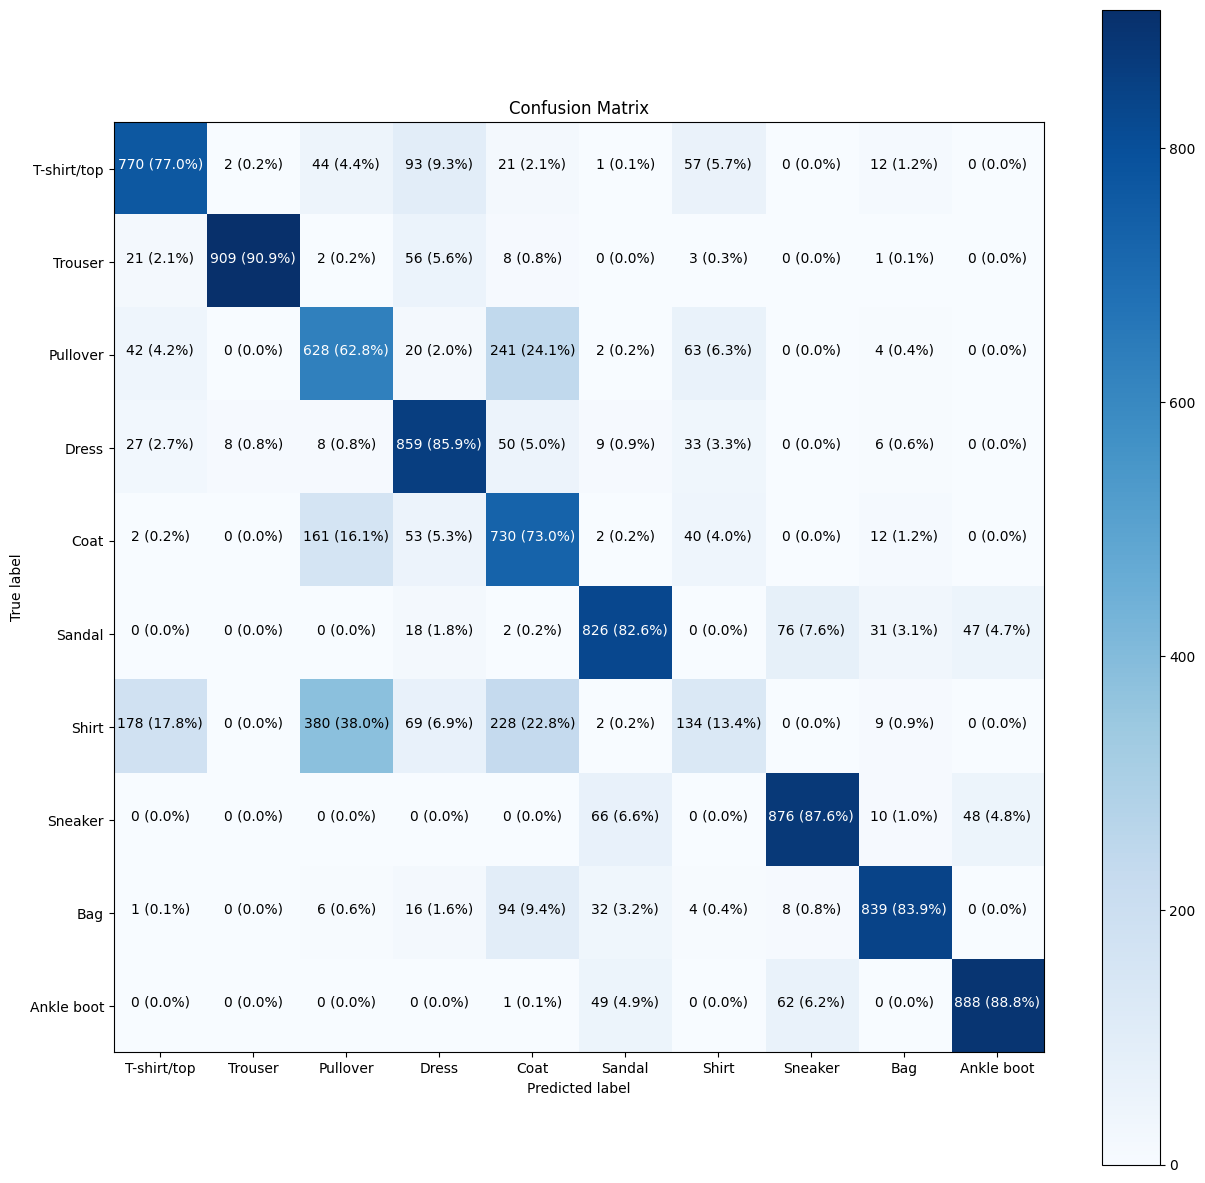

In [100]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
Label the plot with the truth label & the predicted label

In [109]:
import random

def plot_random_image(model, images, true_labels, classes):
    '''
    Picks a random image, plots it and labels it with a prediction and truth label.
    '''
    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    # Add xlabel information (prediction/true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color) # set the color to green or red based on if prediction is right or wrong)

1/1 [==============================] - 0s 33ms/step


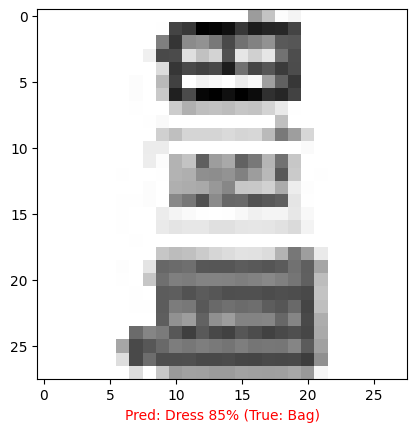

In [143]:
# Check out a random image as well as its prediction
plot_random_image(  model=model_14,
                    images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                    true_labels=test_labels,
                    classes=class_names)

## What parrern is our model learning?

In [125]:
# Find the layers of our most recent model
model_14.layers

In [126]:
# Extract a particular layer
model_14.layers[1]

In [127]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.8302059 , -0.78075266,  0.03412981, -0.02784653],
        [ 0.03413655, -0.6835605 ,  0.47132397,  0.49925324],
        [-0.15093379, -1.1304545 ,  1.0191205 ,  1.0176253 ],
        ...,
        [ 0.376057  , -0.11511107, -0.1662418 , -0.24784401],
        [ 0.3182193 ,  0.67419034, -0.36191264, -0.48908404],
        [ 0.68400836, -0.43372545,  0.34364083,  0.25476214]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector...

In [134]:
# Bias ans biases shape
biases, biases.shape

(array([ 3.1174214 , -0.08613794, -1.1853961 , -1.8520977 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [135]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and ouputs of each layer
plot_model(model_14, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
